In [146]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
 
# Importamos el conjunto de entrenamiento 
 
training_set = pd.read_csv('BBVA_train.csv', sep=',') 
 
# Trabajaremos con la columna “Open” 
training_set = training_set.iloc[:,1:2].values

In [147]:
from sklearn.preprocessing import MinMaxScaler 
 
sc = MinMaxScaler() # por defecto es 0,1 
 
# Normalizamos el conjunto de entrenamiento 
training_set = sc.fit_transform(training_set)

In [148]:
#Preparar el rango de train
X_train = training_set[0:2262]
y_train = training_set[1:2263] 
X_train = np.reshape(X_train, (2262, 1, 1)) 

In [149]:
# Parte 2 – Construyendo la Red Neural Recurrente 
# Importando las librerias y paquetes 
 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM 

In [150]:
# Inicializando la RNN 
# utilizaremos un modelo continuo, modelo de regresión 
 
regressor = Sequential() 
 
# Añadimos una capa de entrada LSTM y una capa Dense
 
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (None, 1))) 

regressor.add(Dense(units = 8, activation = 'sigmoid'))

# Añadimos la capa de salida con una única neurona
 
regressor.add(Dense(units = 1)) 
 
# Compilamos la RNN 
# usamos el error cuadrático medio 
# MSE para regresión 

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error') 
 
# Ajustamos la RNN al conjunto de entrenamiento 
regressor.fit(X_train, y_train, batch_size = 16, epochs =40)

Epoch 1/40
2262/2262 [==============================] - 1s 412us/step - loss: 0.3164
Epoch 2/40
2262/2262 [==============================] - 0s 103us/step - loss: 0.0355
Epoch 3/40
2262/2262 [==============================] - 0s 105us/step - loss: 0.0320
Epoch 4/40
2262/2262 [==============================] - 0s 106us/step - loss: 0.0304
Epoch 5/40
2262/2262 [==============================] - 0s 108us/step - loss: 0.0289
Epoch 6/40
2262/2262 [==============================] - 0s 103us/step - loss: 0.0267
Epoch 7/40
2262/2262 [==============================] - 0s 106us/step - loss: 0.0229
Epoch 8/40
2262/2262 [==============================] - 0s 105us/step - loss: 0.0174
Epoch 9/40
2262/2262 [==============================] - 0s 104us/step - loss: 0.0107
Epoch 10/40
2262/2262 [==============================] - 0s 110us/step - loss: 0.0041
Epoch 11/40
2262/2262 [==============================] - 0s 115us/step - loss: 5.6429e-04
Epoch 12/40
2262/2262 [==============================] - 0s

In [151]:
# Parte 3 – Hacer las predicciones y visualizar los resultados 
# Obtener el precio real de las acciones del 2019 a la fecha
test_set = pd.read_csv('BBVA_test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values #solo el Open
 
# Obtener el precio de las acciones previsto para el 2019 a la fecha de forma iterativa 
inputs = real_stock_price 
inputs = sc.transform(inputs) 
inputs = np.reshape(inputs, (354, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [152]:
#Con un capital de 10000$ inicial, compro todo lo que puedo si mi predicción es mayor que el valor actual, o voy
#corto si mi predicción es menor que el valor actual.
fondos=10000
for x in range(353):
  if(predicted_stock_price[x]>real_stock_price[x]):
    fondos+=(real_stock_price[x+1]-real_stock_price[x]) * fondos/real_stock_price[x]
  if(real_stock_price[x]>predicted_stock_price[x]):
    fondos-=(real_stock_price[x+1]-real_stock_price[x]) * fondos/real_stock_price[x]

print(fondos)

[9784.47934043]


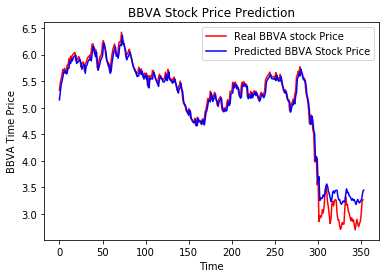

In [153]:
# Visualizando la calidad de las predicciones en una gráfica.
plt.plot(real_stock_price[1:354], color = 'red', label = 'Real BBVA stock Price') 
plt.plot(predicted_stock_price[0:354], color = 'blue', label = 'Predicted BBVA Stock Price') 
plt.title('BBVA Stock Price Prediction') 
plt.xlabel('Time') 
plt.ylabel('BBVA Time Price') 
plt.legend() 
plt.show()